
## Part 1 — Setup & Introduction

This notebook implements *Q-Learning* and *Deep Q-Learning* on the **Taxi-v3** environment using **Gymnasium** and **PyTorch**.  
- Implement tabular Q-Learning
- Run hyperparameter experiments (α and ε)
- Implement a DQN (with experience replay)
- Compare Q-Learning and DQN and produce required metrics and plots

In [1]:
#Install necessary packages
%pip install --upgrade pip
%pip install gymnasium tqdm matplotlib pandas numpy

%pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu

  Using cached pip-25.2-py3-none-any.whl.metadata (4.7 kB)
Using cached pip-25.2-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 24.0
    Uninstalling pip-24.0:
      Successfully uninstalled pip-24.0
Note: you may need to restart the kernel to use updated packages.
   ---------------------------------------- 0.0/951.1 kB ? eta -:--:--
   ---------------------------------------- 951.1/951.1 kB 22.2 MB/s  0:00:00

   -------------------------- ------------- 2/3 [gymnasium]
   -------------------------- ------------- 2/3 [gymnasium]
   -------------------------- ------------- 2/3 [gymnasium]
   -------------------------- ------------- 2/3 [gymnasium]
   -------------------------- ------------- 2/3 [gymnasium]
   -------------------------- ------------- 2/3 [gymnasium]
   -------------------------- ------------- 2/3 [gymnasium]
   -------------------------- ------------- 2/3 [gymnasium]
   -------------------------- ------------- 2/3 [gymnasium]


In [2]:
# Imports and basic environment checks
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

import gymnasium as gym

# create results directory
os.makedirs("results_taxi", exist_ok=True)

# quick check: Taxi environment
env = gym.make("Taxi-v3")
print("Gymnasium version:", gym.__version__)
print("State space size (should be 500):", env.observation_space.n)
print("Action space size (should be 6):", env.action_space.n)

# close the quick env
env.close()


Gymnasium version: 1.2.1
State space size (should be 500): 500
Action space size (should be 6): 6



Starting quick Q-learning (100 episodes)...
Done.

Sample of rewards (first 10): [-551, -605, -551, -542, -533, -362, -578, -479, -461, -326]
Avg reward (last 20): -278.4
Avg steps (last 20): 185.25


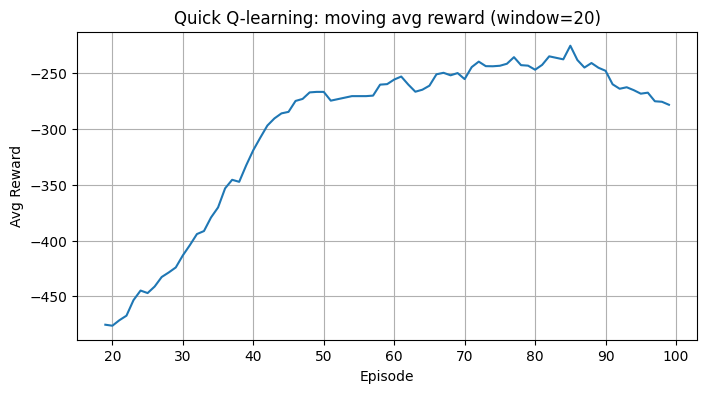

In [3]:

# Minimal Q-learning that runs 100 episodes and prints results
def quick_q_learning(alpha=0.1, epsilon=0.1, gamma=0.9, episodes=100, max_steps=200, seed=42):
    env = gym.make("Taxi-v3")
    np.random.seed(seed)
    env.reset(seed=seed)
    n_states = env.observation_space.n
    n_actions = env.action_space.n
    Q = np.zeros((n_states, n_actions))
    rewards = []
    steps = []
    for ep in range(episodes):
        state, _ = env.reset()
        total = 0
        for t in range(max_steps):
            if np.random.rand() < epsilon:
                action = env.action_space.sample()
            else:
                action = int(np.argmax(Q[state]))
            out = env.step(action)
            if len(out) == 5:
                next_state, reward, terminated, truncated, _ = out
                done = terminated or truncated
            else:
                next_state, reward, done, _ = out
            Q[state, action] += alpha * (reward + gamma * np.max(Q[next_state]) - Q[state, action])
            state = next_state
            total += reward
            if done:
                break
        rewards.append(total)
        steps.append(t+1)
    env.close()
    return Q, rewards, steps

print("\nStarting quick Q-learning (100 episodes)...")
Q, rewards, steps = quick_q_learning(episodes=100)
print("Done.\n")

print("Sample of rewards (first 10):", rewards[:10])
print("Avg reward (last 20):", np.mean(rewards[-20:]))
print("Avg steps (last 20):", np.mean(steps[-20:]))

# Plot moving average (window=20)
import pandas as pd
ma = pd.Series(rewards).rolling(20).mean()
plt.figure(figsize=(8,4))
plt.plot(ma)
plt.title("Quick Q-learning: moving avg reward (window=20)")
plt.xlabel("Episode")
plt.ylabel("Avg Reward")
plt.grid(True)
plt.show()
